In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [76]:
churn=pd.read_csv("Churn_Modelling.csv")

In [77]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [78]:
churn=churn.drop(['RowNumber','CustomerId','Surname'],axis=1)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [79]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [80]:
churn.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [81]:
churn.shape

(10000, 11)

##### Process data

In [82]:
print(churn.Geography.unique())
print("--------------------------")
print(churn.Gender.unique())
print("------------------------")
print(churn.Tenure.unique())

['France' 'Spain' 'Germany']
--------------------------
['Female' 'Male']
------------------------
[ 2  1  8  7  4  6  3 10  5  9  0]


##### Numerical Variables

In [83]:
num_var = [f for f in churn.columns if churn[f].dtype!='O']
num_var

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

##### Discrete variables 

In [84]:
dis_var = [f for f in num_var if churn[f].nunique() < 20]
dis_var

['Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']

In [85]:
churn.Tenure.nunique()

11

##### Continous variable

In [86]:
cont_var = [f for f in num_var if f not in dis_var]
cont_var

['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

##### Categorical Variables

In [87]:
cat_var = [f for f in churn.columns if f not in num_var]
cat_var

['Geography', 'Gender']

#### EDA

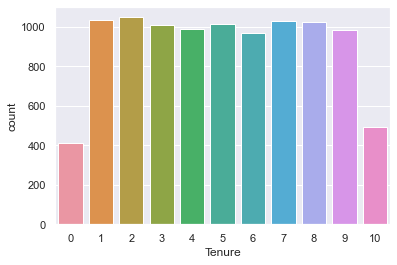

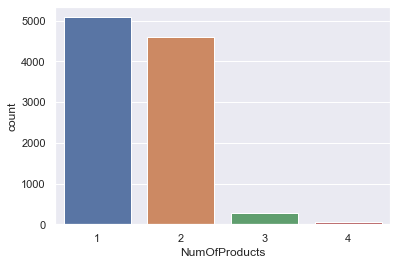

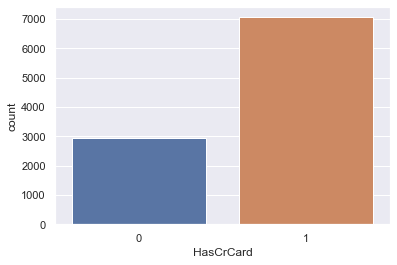

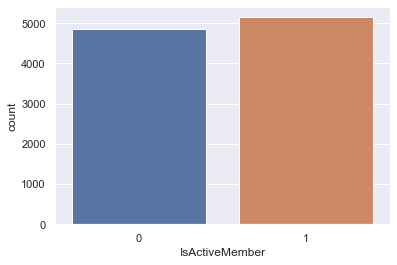

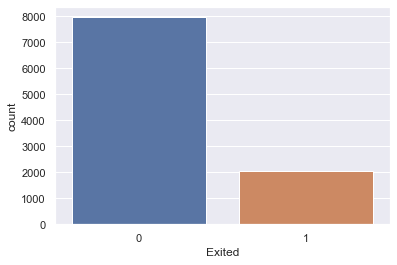

In [88]:
for var in dis_var:
    sns.countplot(churn[var])
    plt.show()

##### Inference : The Dataset is imbalanced (Exited column)

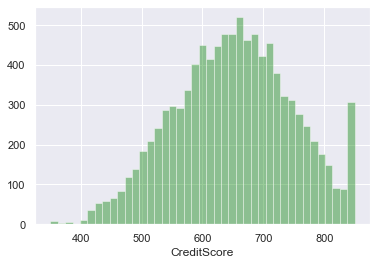

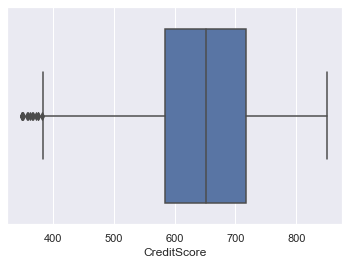

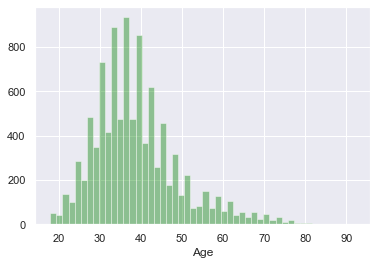

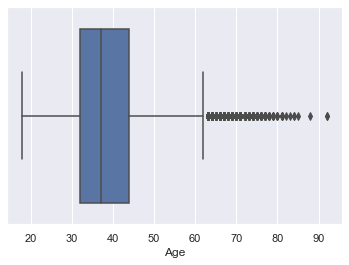

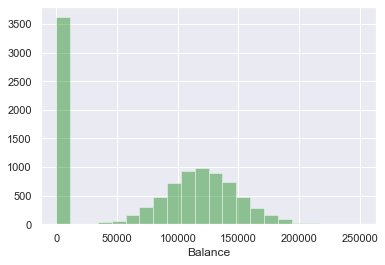

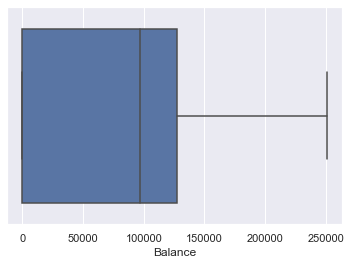

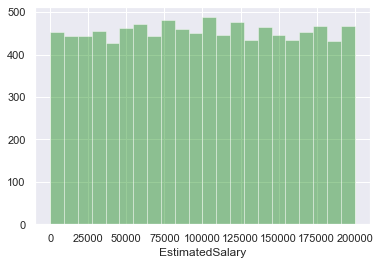

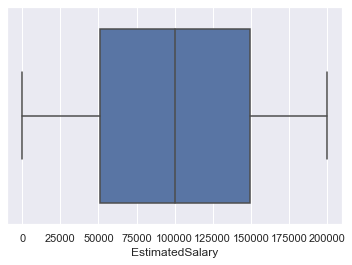

In [89]:
for var in cont_var:
    sns.distplot(churn[var], kde = False, color = "green")
    plt.show()
    sns.boxplot(churn[var])
    plt.show()

##### Inference :

The data does not follow any distribution (Need to convert to gaussian)

There are outliers in CreditScore and Age columns

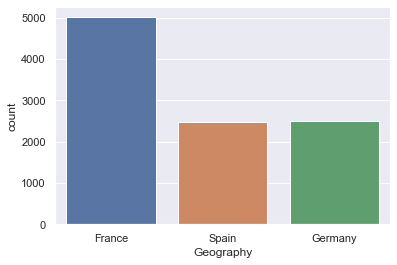

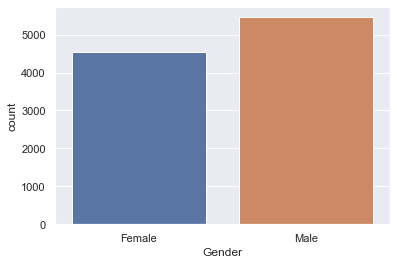

In [90]:
for var in cat_var:
    sns.countplot(churn[var])
    plt.show()

<AxesSubplot:>

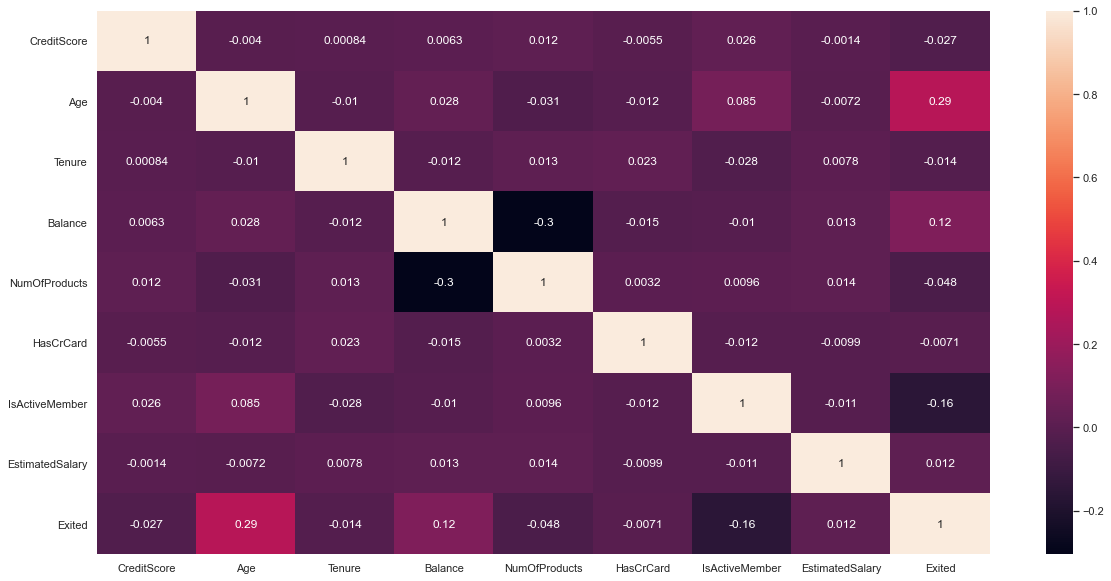

In [92]:
plt.figure(figsize = (20,10))
sns.heatmap(churn.corr(), annot =True)

##### The target variable(exited) is positively correlated with - Age, Balance,Estimated Salary (Weak)

Negatively with - CreditScore,Tenure,NumofProducts,CreditCard,IsActiveMember

<Figure size 1440x720 with 0 Axes>

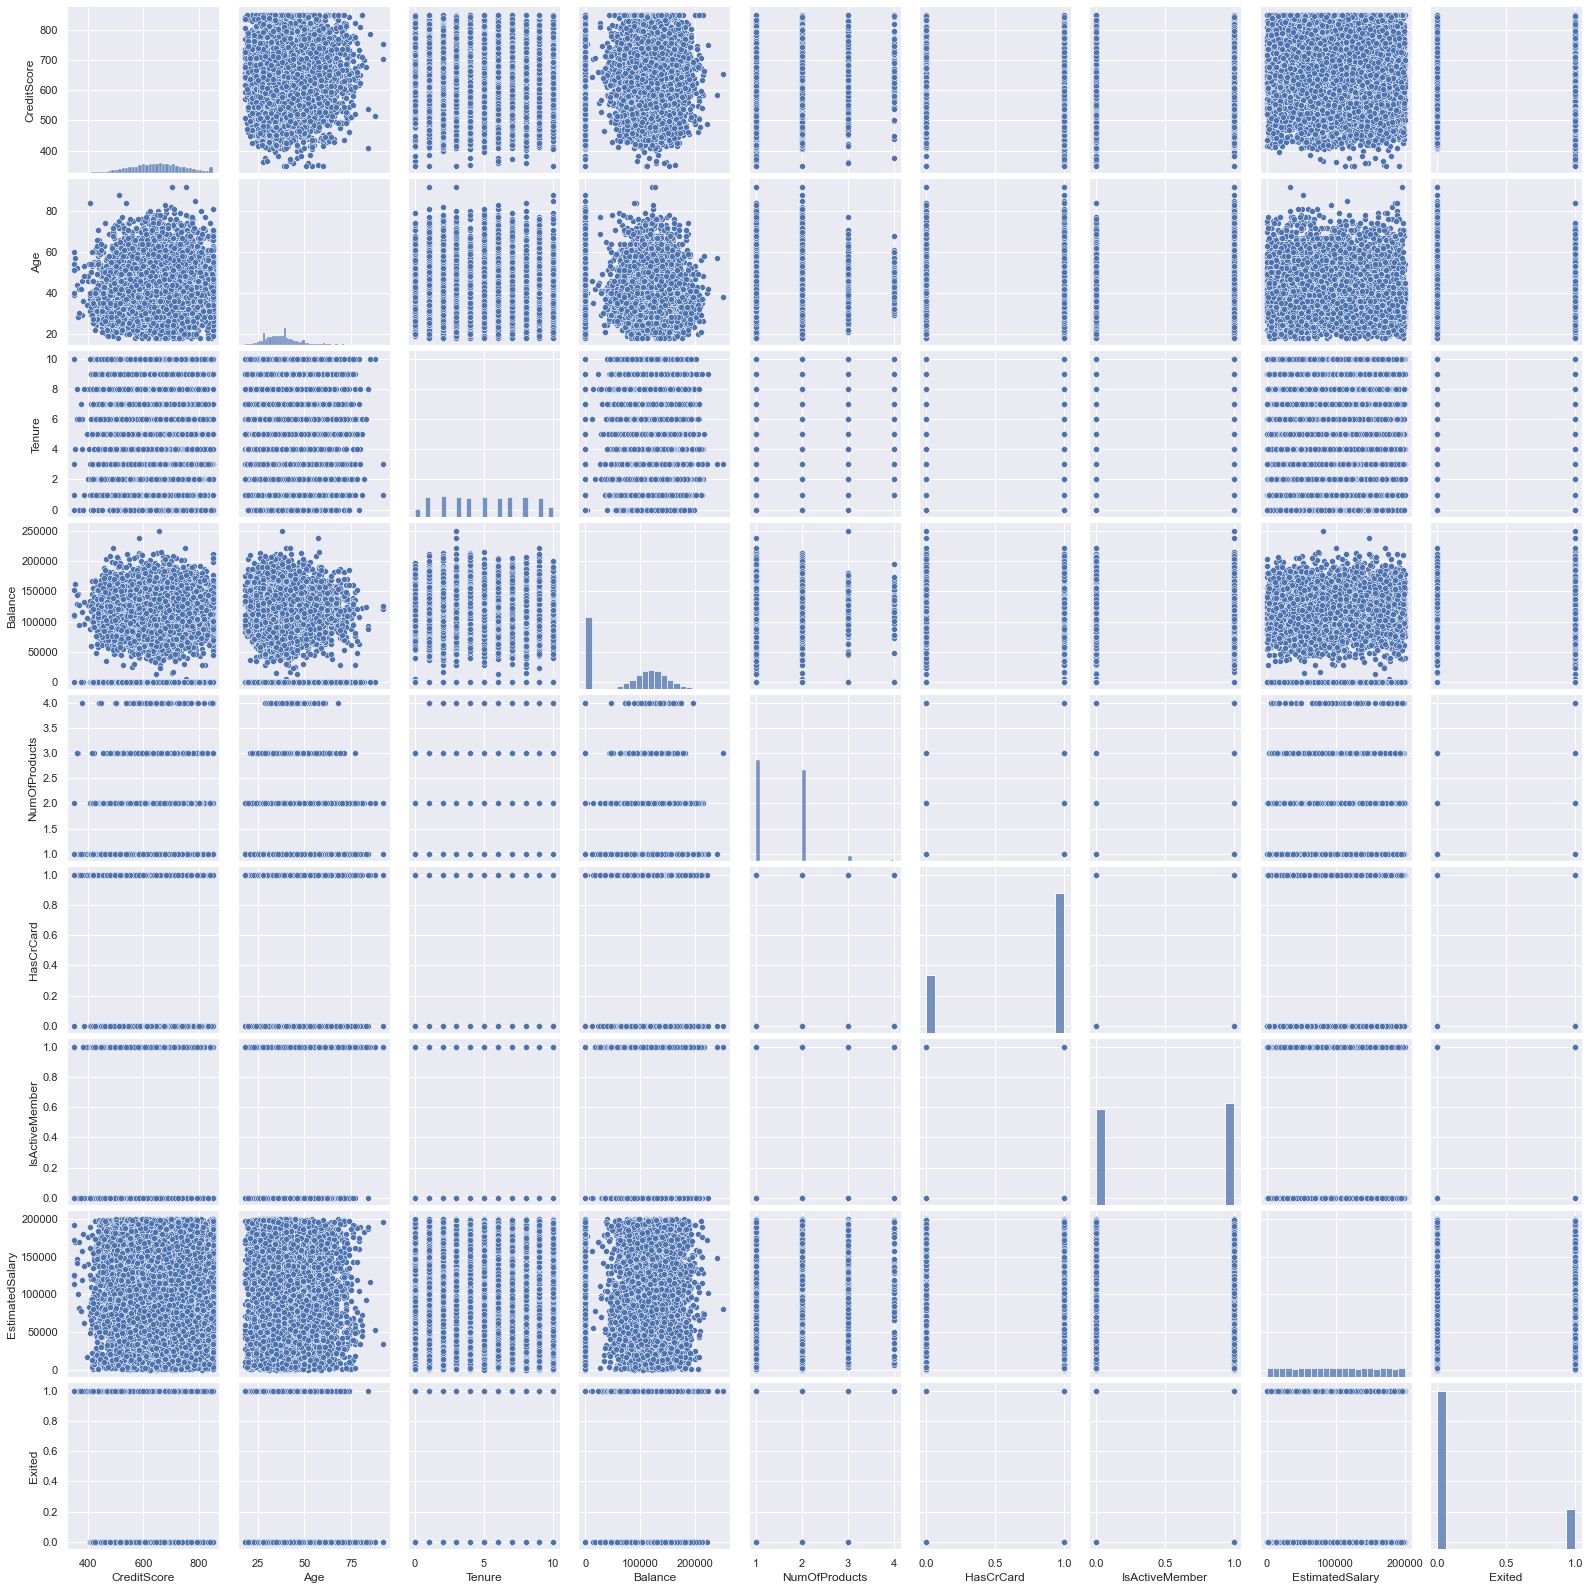

In [94]:
plt.figure(figsize = (20,10))
sns.pairplot(churn)

#### Handling Imbalanced Dataset

In [96]:
exited_yes = churn[churn["Exited"]==1]
exited_no = churn[churn["Exited"]==0]

In [97]:
print(exited_yes.shape,exited_no.shape)

(2037, 11) (7963, 11)


In [99]:
x = churn.drop(["Exited"], axis = 1)
y = churn["Exited"]

In [101]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [102]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [103]:
cat_1 = pd.get_dummies(churn["Geography"], drop_first = True)
cat_2 = pd.get_dummies(churn["Gender"], drop_first = True)

In [104]:
x_t = pd.concat([x,cat_1],axis=1)
x_t_f = pd.concat([x_t,cat_2],axis = 1)
x_t_f.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0


In [105]:
x_t_f = x_t_f.drop(["Geography","Gender"],axis =1)

In [106]:
x_t_f.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [107]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [109]:
from imblearn.over_sampling import SMOTE

In [110]:
oversample = SMOTE(k_neighbors=4)
x_res, y_res = oversample.fit_resample(x_t_f, y)

In [111]:
print(x_res.shape,y_res.shape)

(15926, 11) (15926,)


##### Scaling the features

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
scalar = StandardScaler()

In [114]:
x_res = scalar.fit_transform(x_res)

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size = 0.25)

##### Model Selection and HyperParamter Tuning¶

In [117]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [124]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier


In [126]:
classifier =XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[15:43:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [127]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [129]:
from catboost import CatBoostClassifier

In [130]:
clf1 = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=3, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
clf1.fit(x_train,y_train)


[16:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [133]:
print(clf1.score(x_test,y_test)*100)

85.78603716725264
